In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
import cv2
import matplotlib.pyplot as plt

/home/user/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Loading the dataset returns four NumPy arrays:

The train_images and train_labels arrays are the training set, this is the data the model uses to learn.

The model is tested against the test set, the test_images and test_labels arrays.

In [3]:
len(train_images)

60000

The images are 28x28 numpy arrays, with pixel values ranging between 0 and 255. The labels are an array of integers, ranging from 0 to 9. 

These correspond to the class of clothing the image represents:

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Convert labels to categorical one-hot encoding using keras
 
You may have a sequence that is already integer encoded.You could work with the integers directly, after some scaling.

Alternately, you can one-hot encode the integers directly. This is important to consider if the integers do not have a real ordinal relationship and are really just placeholders for labels.

In [5]:
from keras.utils import to_categorical
#Trainig labels one_hot encoding

values = np.array(train_labels)
print(values)

# one hot encode
encoded = to_categorical(values,num_classes= 10)
print(encoded)

# invert encoding
inverted = np.argmax(encoded[0])
print(inverted)


[9 0 0 ... 3 0 5]
[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
9


In [6]:
#Testing labels one hot encoding

values1 = np.array(test_labels)
print(values)

# one hot encode
encoded1 = to_categorical(values1,num_classes= 10)
print(encoded1)

# invert encoding
inverted = np.argmax(encoded[0])
print(inverted)

[9 0 0 ... 3 0 5]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
9


In this case it is already integer encoded, but in general we should check the class names and do either one hot encoding or integer encoding according to the data.

The below code is for bothe one-hot and integer encoding using 
# sklearn

In [7]:
# from numpy import argmax
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder
# # define example
# class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
#                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# values = np.array(class_names)
# print(values)
# # integer encode
# label_encoder = LabelEncoder()
# integer_encoded = label_encoder.fit_transform(values)
# print(integer_encoded)
# # binary encode
# onehot_encoder = OneHotEncoder(sparse=False)
# integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
# onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
# print(onehot_encoded)
# # invert first example
# inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
# print(inverted)

In [8]:
train_images.shape,test_images.shape,test_labels.shape,train_labels.shape

((60000, 28, 28), (10000, 28, 28), (10000,), (60000,))

In [9]:
encoded[50000]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

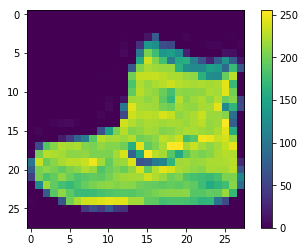

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

We should set the values of 0-255 to 0-1 before feeding to the neural network

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Display the first 25 images from the training set and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.



/home/user/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


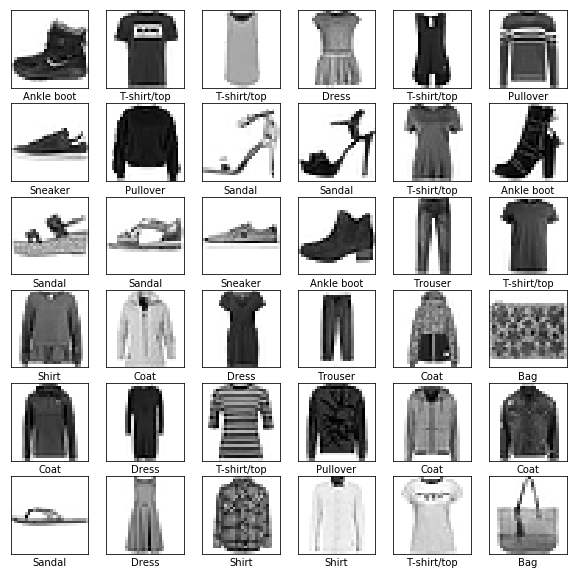

In [12]:
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

# BUILD THE MODEL

Building the neural network requires configuring the layers of the model, then compiling the model.

# Setup the layers
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. And, hopefully, these representations are more meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, like tf.keras.layers.Dense, have parameters that are learned during training.

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the model 
# Different types of compilers
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.

Optimizer —This is how the model is updated based on the data it sees and its loss function.

Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [14]:
# # For a multi-class classification problem

# model.compile(optimizer='rmsprop',
#           loss='categorical_crossentropy',
#           metrics=['accuracy'])


# # For a binary classification problem
# model.compile(optimizer='rmsprop',
#           loss='binary_crossentropy',
#           metrics=['accuracy'])

# # For a mean squared error regression problem
# model.compile(optimizer='rmsprop',
#           loss='mse')

# # For custom metrics
# import keras.backend as K

# def mean_pred(y_true, y_pred):
#     return K.mean(y_pred)

# model.compile(optimizer='rmsprop',
#           loss='binary_crossentropy',
#           metrics=['accuracy', mean_pred])

# model.compile(optimizer=tf.train.AdamOptimizer(0.001), 
#           loss='sparse_categorical_crossentropy',
#           metrics=['accuracy'])

# model.compile(optimizer='rmsprop',
#           loss='categorical_crossentropy',
#           metrics=['accuracy'])

# Training the model with integer encoding, so used loss as sparse_categorical_crossentropy

To start training, call the model.fit method—the model is "fit" to the training data:

In [15]:
model.compile(optimizer=tf.train.AdamOptimizer(0.001), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images,train_labels,epochs = 10, batch_size = 128)

Epoch 1/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.5544 - acc: 0.8112
Epoch 2/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.4011 - acc: 0.8594
Epoch 3/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.3652 - acc: 0.8703
Epoch 4/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.3359 - acc: 0.8788
Epoch 5/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.3184 - acc: 0.8862
Epoch 6/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.2982 - acc: 0.8922
Epoch 7/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.2913 - acc: 0.8941
Epoch 8/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.2787 - acc: 0.8980
Epoch 9/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.2667 - acc: 0.9024
Epoch 10/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.2575 - acc: 0.9066

In [16]:
from keras.callbacks import TensorBoard

tbCallback = TensorBoard(log_dir='./Graph', histogram_freq=0,
                          write_graph=True, write_images=False)

tbCallback.set_model(model)

# Evaluate Accuary

In [17]:
# Test it when test_labels are integer encoded along with train_labels.

test_loss, test_acc = model.evaluate(test_images, test_labels,batch_size = 128) # there is no argument epochs in model.evaluate.

print('Test accuracy:', 'Test_loss: ', test_acc, test_loss)

10000/10000 [==============================] - 0s 12us/step
Test accuracy: Test_loss:  0.8814 0.3273373023033142


# Training the model with one-hot encoded labels, so used loss as categorical_crossentropy

In [18]:
model.compile(optimizer='rmsprop',
          loss='categorical_crossentropy',
          metrics=['accuracy'])
model.fit(train_images, encoded, epochs=10,batch_size = 128)

Epoch 1/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.2627 - acc: 0.9027
Epoch 2/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.2516 - acc: 0.9063
Epoch 3/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.2454 - acc: 0.9105
Epoch 4/10
60000/60000 [==============================] - 1s 25us/step - loss: 0.2387 - acc: 0.9122
Epoch 5/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.2320 - acc: 0.9143
Epoch 6/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.2265 - acc: 0.9173
Epoch 7/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.2231 - acc: 0.9173
Epoch 8/10
60000/60000 [==============================] - 1s 25us/step - loss: 0.2169 - acc: 0.9206
Epoch 9/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.2117 - acc: 0.9206
Epoch 10/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.2084 - acc: 0.9225

Next, compare how the model performs on the test dataset:

# Evaluate Accuracy

In [19]:
# Test it when test_labels are one-hot encoded along with train_labels.
test_loss, test_acc = model.evaluate(test_images, encoded1,batch_size = 128) # there is no argument epochs in model.evaluate.

print('Test accuracy:', 'Test_loss: ', test_acc, test_loss)

10000/10000 [==============================] - 0s 12us/step
Test accuracy: Test_loss:  0.8855 0.34085148923397063


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of overfitting. 
# Overfitting  
 over fitting is when a machine learning model performs worse on new data than on their training data.

# Make predictions
With the model trained, we can use it to make predictions about some images.



In [20]:
predictions = model.predict(test_images)

In [21]:
predictions[0]

array([2.7562491e-08, 6.3125767e-14, 1.2954650e-08, 2.8813939e-11,
       2.2513096e-07, 2.9747405e-03, 1.6614409e-08, 3.2782555e-02,
       1.6826424e-06, 9.6424073e-01], dtype=float32)

A prediction is an array of 10 numbers. 

These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. 

We can see see which label has the highest confidence value:


In [22]:
np.argmax(predictions[0])

9

In [23]:
test_labels[0]

9

Let's plot several images with their predictions.

Correct prediction labels are green and incorrect prediction labels are red.

/home/user/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


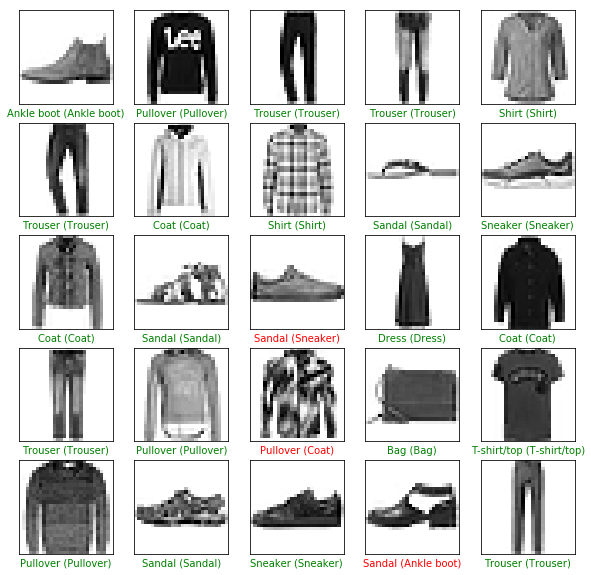

In [24]:
# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)
      


In [25]:
img = test_images[0]

print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once.

So even though we're using a single image, we need to add it to a list:

In [26]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [27]:
# Now predict the image:

predictions = model.predict(img,1)

print(predictions)

[[2.7562439e-08 6.3125767e-14 1.2954650e-08 2.8813885e-11 2.2513117e-07
  2.9747405e-03 1.6614409e-08 3.2782540e-02 1.6826456e-06 9.6424073e-01]]


model.predict returns a list of lists, one for each image in the batch of data.

Grab the predictions for our (only) image in the batch:

In [28]:
predictions = predictions[0]
# np.argmax(predictions[190]) #index 190 is out of bounds for axis 0 with size 10
np.argmax(predictions)

9